# Naive Bayes Algorithm

Naive Bayes is a simple yet powerful classification algorithm based on Bayes' theorem. It is widely used in various machine learning applications, such as text classification, spam filtering, sentiment analysis, and recommendation systems.

**Assumption:** Each feature is conditionally independent of every other feature.

## Inspiration behind Naive Bayes

Naive Bayes is inspired by Bayes' theorem, which is a fundamental concept in probability theory. Bayes' theorem allows us to update our beliefs about an event based on new evidence. It calculates the probability of an event given prior knowledge or evidence.

Bayes' theorem is defined as follows:

\begin{equation}
P(A|B) = \frac{P(B|A) * P(A)}{P(B)}
\end{equation}

where:

- $P(A|B)$ is the probability of event $A$ occurring given that event $B$ has occurred.
- $P(B|A)$ is the probability of event $B$ occurring given that event $A$ has occurred.
- $P(A)$ and $P(B)$ are the probabilities of events $A$ and $B$ occurring independently.

To derive the Naive Bayes equation using Bayes' theorem, let's consider a classification problem with a set of features or predictors $X = {X1, X2, ..., Xn}$ and a target class $C$. We want to calculate the probability of the class $C$ given the features $X$, denoted as $P(C|X)$.

\begin{align*}
P(C|X) &= \frac{P(X|C) \cdot P(C)}{P(X)} \\
&= \frac{P(X_1, X_2, \ldots, X_n|C) \cdot P(C)}{P(X)} \\
&= \frac{P(X_1|C) \cdot P(X_2|C) \cdot \ldots \cdot P(X_n|C) \cdot P(C)}{P(X)} \\
&= \frac{P(X_1|C) \cdot P(X_2|C) \cdot \ldots \cdot P(X_n|C) \cdot P(C)}{P(X)} \\
&= \frac{P(X_1|C) \cdot P(X_2|C) \cdot \ldots \cdot P(X_n|C) \cdot P(C)}{P(X)} \\
&= \frac{P(C) \cdot \prod P(X_i|C)}{P(X)}
\end{align*}

The final class label of $X$ is the class that maximizes the value of $P(C|X)$.

## Naive Bayes Best and Worst Case Senarios

| **Best Case**                                                                                       | **Worst Case**                                                                                       |
|-----------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| - Feature independence assumption holds or is nearly true.                                          | - Features are highly correlated, violating the independence assumption.                             |
| - Excellent for text classification tasks.                                                          | - Suboptimal performance when feature independence is not realistic.                                  |
| - Efficient with high-dimensional data.                                                             | - Insufficient training data.                                                                         |
| - Performs well even with limited training data.                                                    | - Other algorithms like logistic regression or decision trees may be more appropriate in such cases.  |



## Laplace Additive Smoothing

In case of Naive Bayes, we mostly deal with textual data. So in some scenarios, we may arise with the condition where we encouter a word $w_o$ that is not present in our training data.

$P(C|X) = \frac{P(C) \cdot P(w_1|C) \cdot P(w_2|C) \cdot \ldots \cdot P(w_o|C)}{P(w)}$

- If we drop this word $w_o$ then from above equation we get $P(w_o|C) = 1$, which cannot be true.
- If we calculate its probability as usual, $P(w_o|C) = 0$, which makes the entire equation $0$.

To overcome this issue, Laplace Additive Smooting comes into play, which suggest the following equation:

$P(w_o|C) = \frac{n + \alpha}{N + \alpha \cdot k}$

where,

- n = Number of training data containing word $w_o$
- $\alpha$ = Hyperparameter (typically $\alpha$ = 1)
- N = Total number of training data
- k = Number of distinct values $w_o$ can take

## Log Probabilities for Numerical Stability

Probability lies between 0 and 1. When we multiply large number of probabilities numerical unstability occurs, i.e.

$P = P1*P2*P3*P4 = 0.2*0.1*0.1*0.2 = 0.0004$

In python double precision has only 16 significant values, which may overflow for a large sequence of words. So there is the possibility of numerical underflow and python starts rounding numbers which creates deviation in the result.

We can use `log` to convert these numerical product to sum:

$log(P) = log(P1*P2*P3*P4) = log(p1) + log(p2) + log(p3) + log(p4) = 0.2 + 0.1 +0.1 + 0.2 = 0.6$

## Bias-Variance Tradeoff

We know,

- High bias -> Underfit
- High variance -> Overfit

In any algorithms hyperparameter play their role for bias-variance tradeoff. In case of Naive Bayes, $\alpha$ (as discussed under Laplace Additive Smoothing) is the hyperparameter.

Consider a balanced dataset with 1000 positive (y=1) and 1000 negative (y=0) data points. Then the probability of any word $w_i$, (let's say $w_i$ occured twice in the positive training data) to belong to positive class is given by:

$P(w_i|y=1) = \frac{n + \alpha}{N + \alpha \cdot k} = \frac{n + \alpha}{N + \alpha \cdot k}$

**Case I:** When $\alpha$ is small (let's say $\alpha$=0)

$P(w_i|y=1) = \frac{2 + 0}{1000 + 0 \cdot 2} = \frac{2}{1000} = 0.002$

Here we took $k=2$ assuming $k$ can take two values `present` or `not present`.

So when we remove $w_i$ from the training data, i.e. $n=0$, we are making a small change by removing 2 from the numerator. However this small change makes the overall  probability zero, which is a drastic change in probability. In another words a small change in training data created a huge change in output, i.e. variance is high. So, from this we can draw an insight that when $\alpha$ is small, we are possibly overfitting.

**Case II:** When $\alpha$ is large (let's say $\alpha$=100)

$P(w_i|y=1) = \frac{2 + 1000}{1000 + 1000 \cdot 2} = \frac{1002}{3000} = 0.334$

When we remove $w_i$ from the training data, i.e. $n=0$, the probability becomes:

$P(w_i|y=1) = \frac{0 + 1000}{1000 + 1000 \cdot 2} = \frac{1000}{3000} = 0.333$

This looks like removing $w_i$ from the training data creates almost no change in the output. Also the result of Naive Bayes classifier for both classes looks like:

$P(y=1|w_1, w_2, \ldots, w_n) = \frac{P(y=1) \cdot \prod P(w_i|y=1)}{P(w)} ≈ \frac{1}{2} \cdot \frac{P(y=1)}{P(w)}$

$P(y=0|w_1, w_2, \ldots, w_n) = \frac{P(y=0) \cdot \prod P(w_i|y=0)}{P(w)} ≈ \frac{1}{2} \cdot \frac{P(y=1)}{P(w)}$

We see, in both the cases $\prod P(w_i|y=...)$ becomes nearly equals to $\frac{1}{2}$, no matter what the value of $w_i$ be. So our model does not have much to do i.e. we are underfitting.

## Types of Naïve Bayes Model:

There are three types of Naive Bayes Model, which are given below:

- **Gaussian:** The Gaussian model assumes that features follow a normal distribution. This means if predictors take continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution.
    
- **Multinomial:** The Multinomial Naïve Bayes classifier is used when the data is multinomial distributed. It is primarily used for document classification problems, it means a particular document belongs to which category such as Sports, Politics, education, etc. The classifier uses the frequency of words for the predictors.
    
- **Bernoulli:** The Bernoulli classifier works similar to the Multinomial classifier, but the predictor variables are the independent Booleans variables. Such as if a particular word is present or not in a document. This model is also famous for document classification tasks.

- **Complement:** It is an adaptation of Multinomial NB where the complement of each class is used to calculate the model weights. So, this is suitable for imbalanced data sets and often outperforms the MNB on text classification tasks.

- **Categorical:** Categorical Naive Bayes is useful if the features are categorically distributed. We have to encode the categorical variable in the numeric format using the ordinal encoder for using this algorithm.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for better visualization
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

# Display the first few rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model with training data
gnb.fit(X_train, y_train)

GaussianNB()

In [6]:
# Predict the labels for the test set
y_pred = gnb.predict(X_test)

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nClassification Report:")
print(class_report)

Accuracy: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



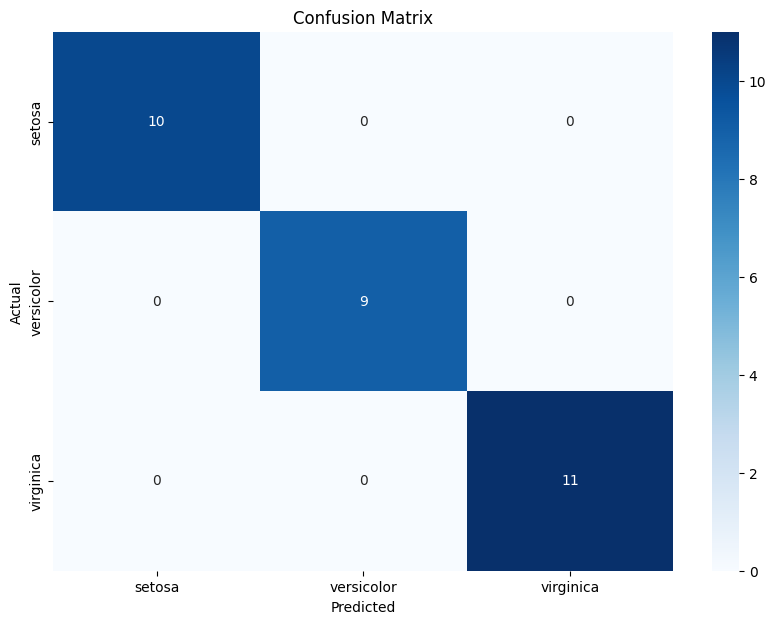

In [16]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Applications of Naive Bayes Classifier

- **Spam Email Filtering:** Classifies emails as spam or non-spam based on features.
- **Text Classification:** Used in sentiment analysis, document categorization, and topic classification.
- **Medical Diagnosis:** Helps in predicting the likelihood of a disease based on symptoms.
- **Credit Scoring:** Evaluates creditworthiness of individuals for loan approval.
- **Weather Prediction:** Classifies weather conditions based on various factors.